In [1]:
# Import Pandas, Numpy
import pandas as pd
import numpy as np
# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the CSV file
df = pd.read_csv('gbpusd.csv', index_col=0, parse_dates=True, dayfirst=False)['2011':'2023']
df


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-07-06,1.2728,1.2705,1.2780,1.2674,NaN,0.19%
2023-07-05,1.2704,1.2713,1.2737,1.2687,NaN,-0.06%
2023-07-04,1.2712,1.2694,1.2740,1.2682,NaN,0.17%
2023-07-03,1.2691,1.2687,1.2725,1.2658,NaN,-0.10%
2023-06-30,1.2704,1.2619,1.2729,1.2599,NaN,0.73%
...,...,...,...,...,...,...
2011-01-07,1.5558,1.5471,1.5581,1.5410,NaN,0.59%
2011-01-06,1.5466,1.5520,1.5563,1.5449,NaN,-0.30%
2011-01-05,1.5512,1.5586,1.5628,1.5451,NaN,-0.47%


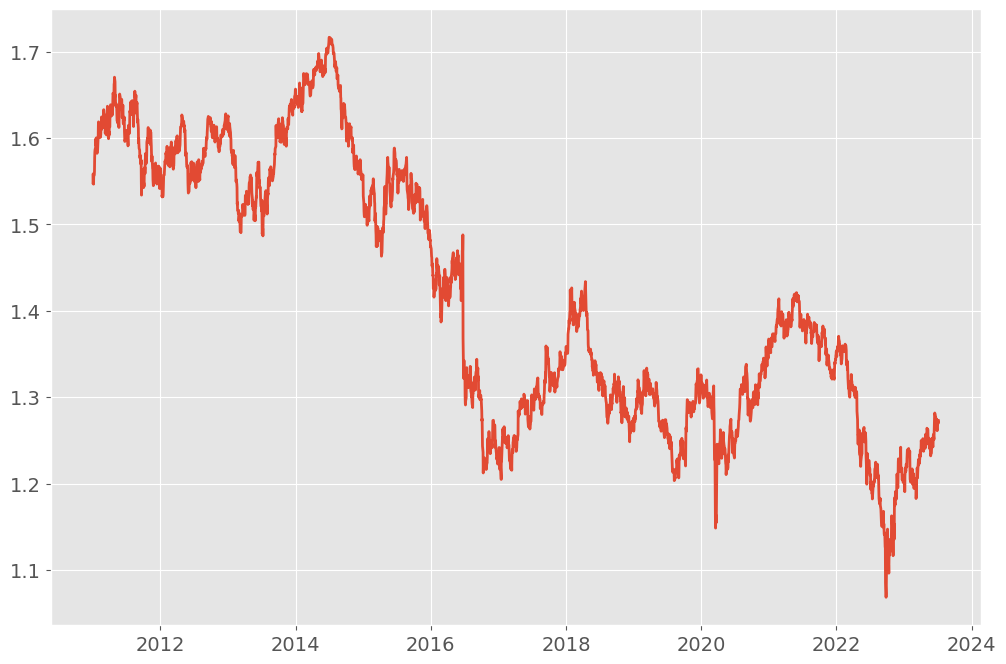

In [6]:
# Visualize the plot to verify the data
plt.plot(df.index, df['Price'])

In [8]:
# get last 300 index values
df.index[-300:]


DatetimeIndex(['2012-02-24', '2012-02-23', '2012-02-22', '2012-02-21',
               '2012-02-20', '2012-02-17', '2012-02-16', '2012-02-15',
               '2012-02-14', '2012-02-13',
               ...
               '2011-01-14', '2011-01-13', '2011-01-12', '2011-01-11',
               '2011-01-10', '2011-01-07', '2011-01-06', '2011-01-05',
               '2011-01-04', '2011-01-03'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

In [11]:
# Calculate returns and add it to existing DataFrame as a column
df['Return'] = df['Price'].pct_change().fillna(0)
# Get first 5 rows
df.head()


,Price,Open,High,Low,Vol.,Change %,Return
Date,,,,,,,
2023-07-06,1.2728,1.2705,1.2780,1.2674,NaN,0.19%,0.000000
2023-07-05,1.2704,1.2713,1.2737,1.2687,NaN,-0.06%,-0.001886
2023-07-04,1.2712,1.2694,1.2740,1.2682,NaN,0.17%,0.000630
2023-07-03,1.2691,1.2687,1.2725,1.2658,NaN,-0.10%,-0.001652
2023-06-30,1.2704,1.2619,1.2729,1.2599,NaN,0.73%,0.001024


In [12]:
# Calculate mean and sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])
mu, sigma

(7.608871988196191e-05, 0.005683069582926463)

In [13]:
def zscore(returns):
    zs = (returns - np.mean(returns))/np.std(returns)
    return zs

In [14]:
# Calculate the scaled return : zscore
df['Scaled_Return'] = df['Return'].apply(lambda x: (x-mu)/sigma)
# Check the output
df.head()


,Price,Open,High,Low,Vol.,Change %,Return,Scaled_Return
Date,,,,,,,,
2023-07-06,1.2728,1.2705,1.2780,1.2674,NaN,0.19%,0.000000,-0.013389
2023-07-05,1.2704,1.2713,1.2737,1.2687,NaN,-0.06%,-0.001886,-0.345182
2023-07-04,1.2712,1.2694,1.2740,1.2682,NaN,0.17%,0.000630,0.097418
2023-07-03,1.2691,1.2687,1.2725,1.2658,NaN,-0.10%,-0.001652,-0.304074
2023-06-30,1.2704,1.2619,1.2729,1.2599,NaN,0.73%,0.001024,0.166857


In [15]:
# Calculate minimum and maximum bin range
sr_min = np.min(df['Scaled_Return'])
sr_max = np.max(df['Scaled_Return'])
sr_min, sr_max

(-5.376503539378585, 15.40894561164843)

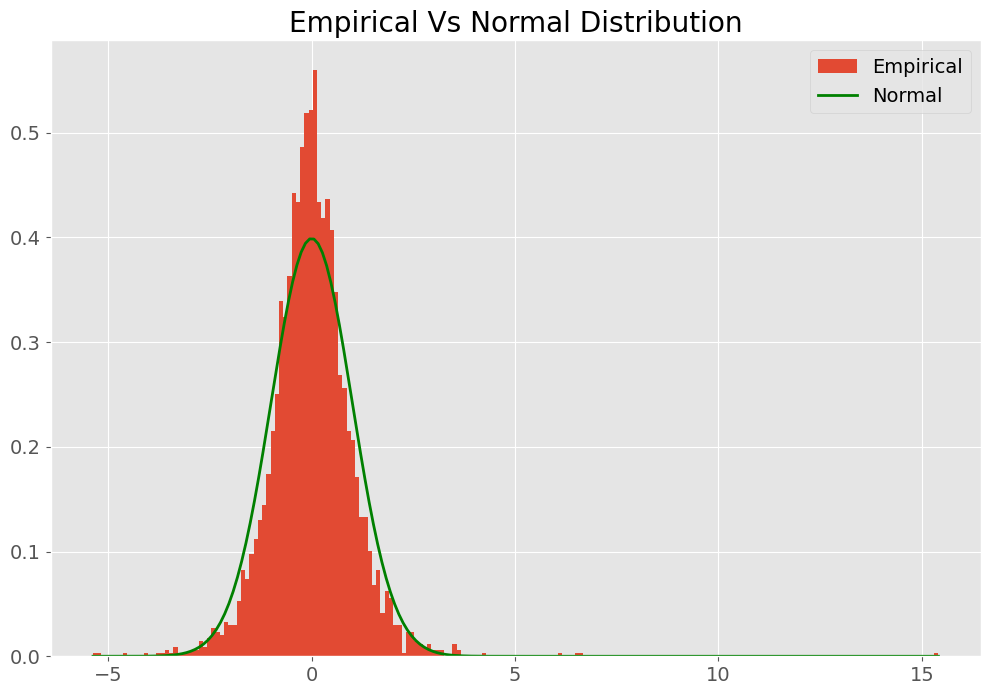

In [16]:
# Define bins - x
x = np.linspace(sr_min, sr_max, 200)
# Calculate normal probability density function - y
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))
# Plot histogram of scaled returns
plt.hist(df['Scaled_Return'], bins=200, density=True, label='Empirical', alpha=1)
# Plot norm pdf
plt.plot(x,y, color='green', label='Normal', alpha=1)
# Set x and y axis limits
# plt.xlim(-4,4)
# plt.ylim(0,0.7)
# Set title
plt.title('Empirical Vs Normal Distribution')
# Set legends
plt.legend()
plt.show()